# Feature 따른 예측값 변화 PDP, ICE

# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

# 데이터 불러오기

In [2]:
data = pd.read_csv('./data/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 상업지역 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사1명당 학생수
    * lstat : 하위계층 비율
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

# 필요한 함수 정의하기

In [3]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

# 데이터 준비하기

##### 1) x, y로 나누기

In [4]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

##### 2) 가변수화

따로 가변수화할 변수가 없다

##### 3) train : validation 분할

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 20)
x_train.shape

(404, 12)

# 모델 생성

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

# PDP, ICE

## 1) 특정 행에서, 각 변수의 영향력 살펴보기

In [8]:
data1 = x_train.iloc[[0]]
data1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15


* 변수 중 crim의 영향력을 살펴보자.
    * ① x_train에서 crim의 값들을 뽑는다.
    * ② data1의 crim 에 ①의 값을 하나씩 넣으며 예측값을 계산한다.
    * ③ 이를 그래프로 그립니다. x축 : crim, y축 : 예측값

In [9]:
# ① x_train에서 crim의 값들을 뽑는다.
crim_values = x_train['crim'].sort_values()
crim_values

0       0.00632
285     0.01096
341     0.01301
55      0.01311
54      0.01360
         ...   
404    41.52920
414    45.74610
410    51.13580
405    67.92080
418    73.53410
Name: crim, Length: 404, dtype: float64

In [10]:
# ② data1의 crim 에 ①의 값을 하나씩 넣으며 예측값을 계산한다.
pred_crim = []

for cr in crim_values :
    data1['crim'] = cr
    pred_crim.append(model.predict(data1)[0])

pred_crim

[23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999999975,
 23.522999999

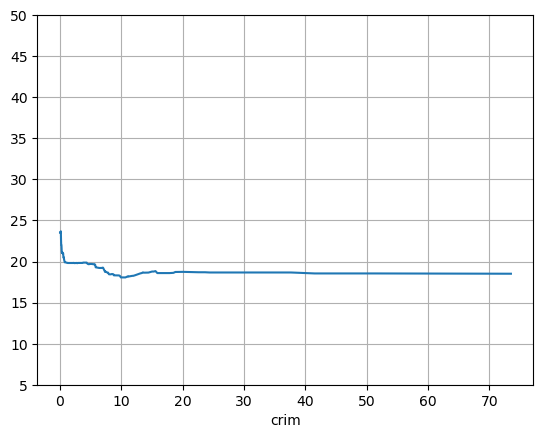

In [11]:
# ③ 이를 그래프로 그립니다. x축 : crim, y축 : 예측값
sns.lineplot(x = crim_values, y = pred_crim)
plt.ylim(y_train.min(), y_train.max())  # 실제 값의 범위 지정
plt.grid()
plt.show()

In [12]:
y_train.describe()

count    404.000000
mean      22.763614
std        9.456729
min        5.000000
25%       16.700000
50%       21.400000
75%       26.525000
max       50.000000
Name: medv, dtype: float64

* 다른 변수의 영향력도 살펴보자.
    * lstat
    * ptratio
    * rm

In [13]:
def ice_plot(model, x, y, data_1row, var) :

    # ① x_train에서 crim의 값들을 뽑습니다.
    x_values = x[var].sort_values()

    # ② data1의 crim 에 ①의 값을 하나씩 넣으며 예측값을 계산합니다.
    pred = []

    for v in x_values :
        data_1row[var] = v
        pred.append(model.predict(data_1row)[0])

    # ③ 이를 그래프로 그립니다. x축 : crim, y축 : 예측값
    sns.lineplot(x = x_values, y = pred)
    plt.ylim(y.min(), y.max())  # 실제 값의 범위 지정
    plt.grid()
    plt.show()

In [14]:
data1.shape, x_train.shape

((1, 12), (404, 12))

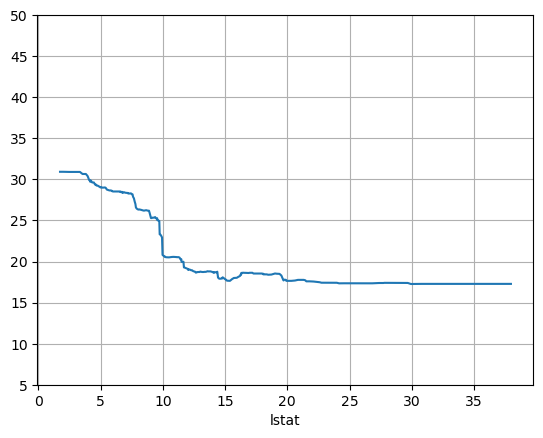

In [15]:
ice_plot(model, x_train, y_train, data1, 'lstat')

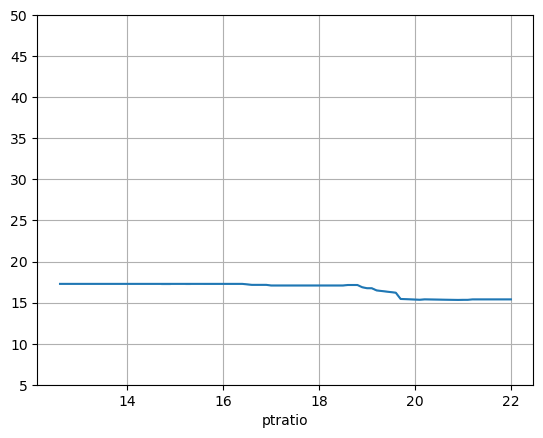

In [16]:
ice_plot(model, x_train, y_train, data1, 'ptratio')

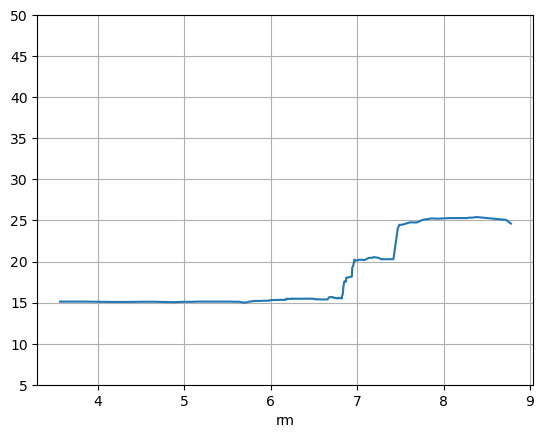

In [17]:
ice_plot(model, x_train, y_train, data1, 'rm')

## 2) 여러행에서, 특정 변수의 영향력 살펴보기

* ① x_train에서 20개의 행을 랜덤으로 뽑는다.
* ② 20개 행에 대해서 lstat의 영향력을 그래프로 그린다.(ice plot)
* ③ 이들의 평균선을 추가한다.(PDP)

In [18]:
# ① x_train에서 20개의 행을 랜덤으로 뽑습니다.
data20 = x_train.sample(20, random_state = 2023)
data20

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
38,0.17505,0.0,5.96,0,0.4990,5.966,30.2,3.8473,5,279,19.2,10.13
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,3.81
471,4.03841,0.0,18.10,0,0.5320,6.229,90.7,3.0993,24,666,20.2,12.87
383,7.99248,0.0,18.10,0,0.7000,5.520,100.0,1.5331,24,666,20.2,24.56
290,0.03502,80.0,4.95,0,0.4110,6.861,27.9,5.1167,4,245,19.2,3.33
206,0.22969,0.0,10.59,0,0.4890,6.326,52.5,4.3549,4,277,18.6,10.97
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,21.78
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,3.95
441,9.72418,0.0,18.10,0,0.7400,6.406,97.2,2.0651,24,666,20.2,19.52
18,0.80271,0.0,8.14,0,0.5380,5.456,36.6,3.7965,4,307,21.0,11.69


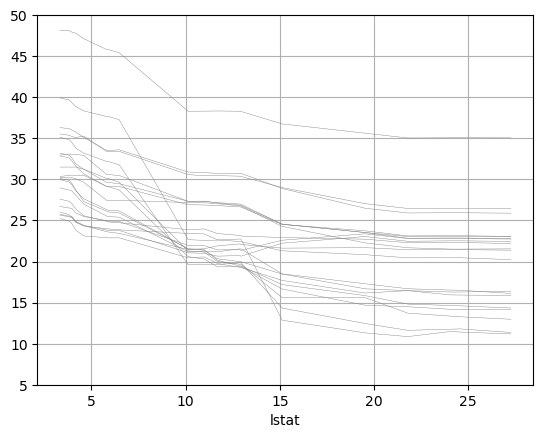

In [19]:
# ② 20개 행에 대해서 lstat의 영향력을 그래프로 그린다.(ice plot)

var = 'lstat'

for i in range(20) :

    # 특정 변수의 값을 뽑아 정렬
    x_values = data20[var].sort_values()

    # 행 하나씩 추출
    data1 = data20.iloc[[i]]

    # 추출된 한 행에서, 특정 변수의 값을 하나씩 대입하고 예측
    pred = []
    for v in x_values :
        data1[var] = v
        pred.append(model.predict(data1)[0])

    # 한 행에 대한 라인플롯, x축 : 특정 변수의 값, y축 : 예측값.
    sns.lineplot(x = x_values, y = pred, color = 'gray', linewidth = 0.3)
    plt.ylim(y_train.min(), y_train.max())  # 실제 값의 범위 지정

plt.grid()
plt.show()

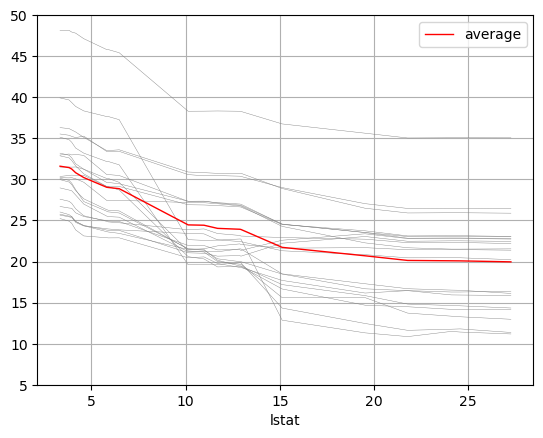

In [20]:
# ③ 이들의 평균선을 추가한다.(PDP!)

# 개별 라인차트들 -----------------------------------------------------
var = 'lstat'
pred_values = []
for i in range(20) :

    x_values = data20[var].sort_values()
    data1 = data20.iloc[[i]]
    pred = []

    for v in x_values :
        data1[var] = v
        pred.append(model.predict(data1)[0])

    pred_values.append(pred)

    sns.lineplot(x = x_values, y = pred, color = 'gray', linewidth = 0.3)
    plt.ylim(y_train.min(), y_train.max())  # 실제 값의 범위 지정

# -----------------------------------------------------------------------
# 평균선 추가 -----------------------------------------------------------
pred_mean = np.array(pred_values).mean(axis = 0)
sns.lineplot(x = x_values, y = pred_mean, color = 'red', linewidth = 1, label = 'average')

plt.grid()
plt.show()

# 함수 이용하기

In [21]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

## PDP 그리기
* model : 이미 만든 모델
* features : 분석할 대상 feature
* X : 데이터셋(x)
* kind : 'both' ➡ plotting both Partial dependence (PD) and individual conditional expectation (ICE)

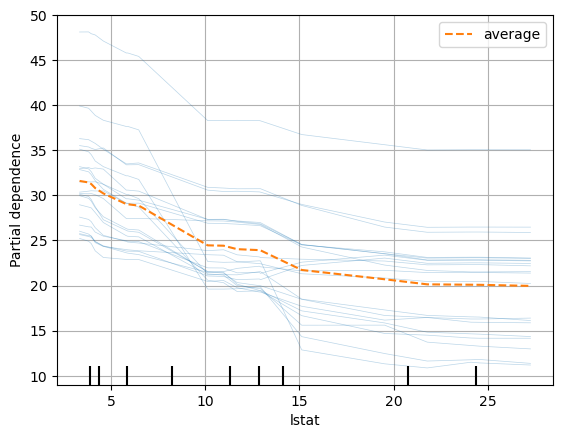

In [22]:
var = 'lstat'
PartialDependenceDisplay.from_estimator(model, data20, [var], kind="both")
plt.grid()
plt.show()

In [23]:
var = 'rm'
temp = x_train.head(3).copy()

pdp = partial_dependence(model, features = [var], X = temp, kind = 'both')
print(pdp['average'])
print(pdp['individual'])
print(pdp['values'])

[[25.59066667 27.85066667 38.284     ]]
[[[23.619 23.472 32.771]
  [28.551 31.937 43.636]
  [24.602 28.143 38.445]]]
[array([6.172, 6.727, 7.47 ])]


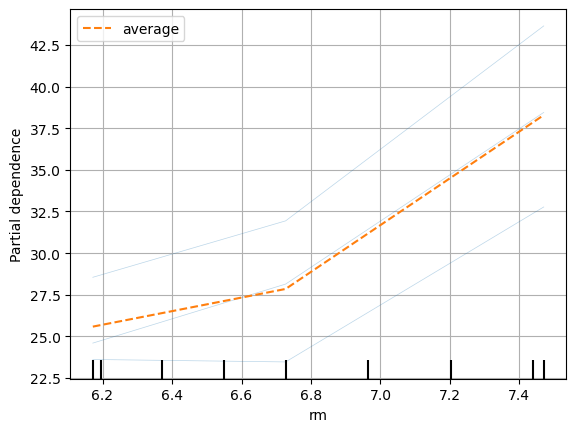

In [24]:
PartialDependenceDisplay.from_estimator(model, temp, [var], kind="both")
plt.grid()
plt.show()

In [25]:
temp

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,3.16
80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281,19.0,5.29


* 수동으로 만들기

In [26]:
temp['rm'] = 6.172
temp
model.predict(temp)

array([23.619, 28.551, 24.602])

* 전체 데이터에 대해서 살펴봅시다.

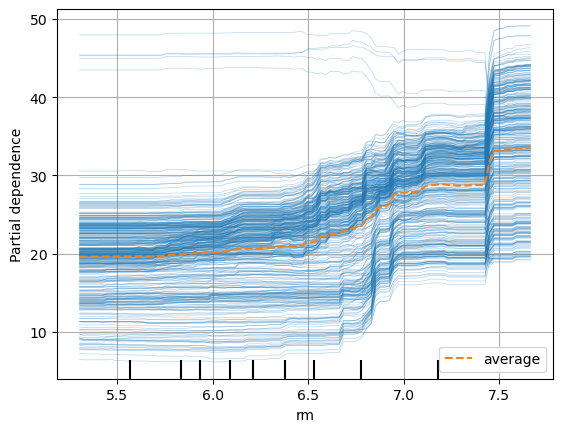

In [27]:
PartialDependenceDisplay.from_estimator(model,
                                        x_train,
                                        ['rm'],
                                        kind="both")
plt.grid()
plt.show()

### 두 변수의 영향력 비교
* 변수 입력 : 리스트로

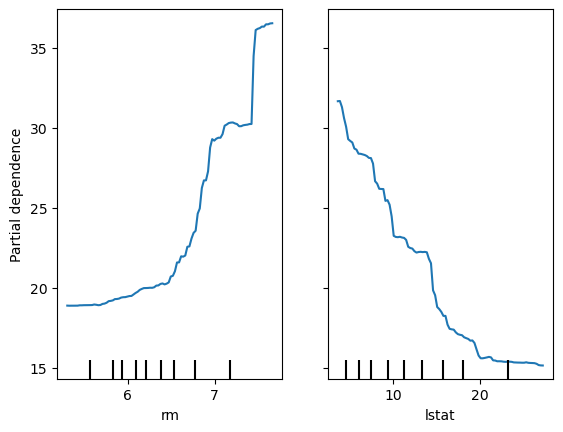

In [28]:
PartialDependenceDisplay.from_estimator(model, x_train, ['rm','lstat'])
plt.show()

### 두 변수의 조합으로 분석
* 리스트 안에 튜플로 입력

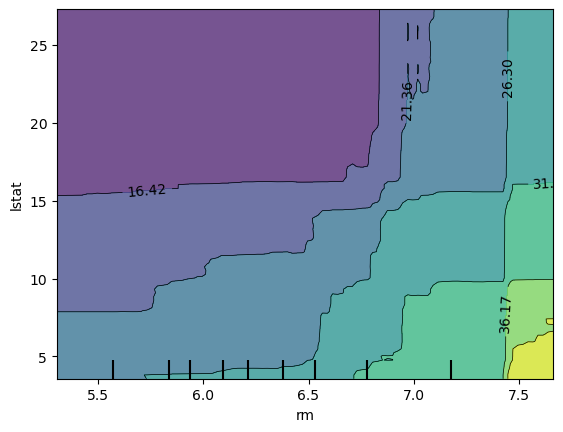

In [29]:
PartialDependenceDisplay.from_estimator(model, x_train, [('rm','lstat')])
plt.show()